# Graphenexploration

## Gerichtete Graphen

Wir verwenden hier `networkx` zur Repräsentation und zur Darstellung von gerichteten Graphen:

In [117]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5])
g.add_edge(1,2)
g.add_edge(4,2)
g.add_edge(3,5)
g.add_edge(2,3)
g.add_edge(5,4)

g = nx.gnm_random_graph(10, 20, directed=True)


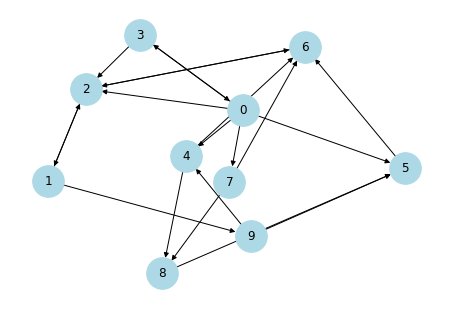

In [118]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_size=1000, node_color='lightblue')

## Tiefensuche

In [2]:
def depth_first_exploration(graph, node, visited=None):
    if visited is None:
        visited = set()
    if node in visited:
        return
    visited.add(node)
    print("exploring", node)
    for s in graph.successors(node):
        depth_first_exploration(graph, s, visited)

In [119]:
depth_first_exploration(g, 0)

exploring 0
exploring 7
exploring 6
exploring 2
exploring 1
exploring 9
exploring 4
exploring 8
exploring 5
exploring 3


In [120]:
def depth_first_exploration_with_animation_data(graph, node, visited=None, counter=1, labels={}, data=[]):
    return_data = False
    if visited is None:
        visited = set()
        return_data = True
    if node in visited:
        return
    visited.add(node)
    labels[node] = counter
    counter += 1
    data.append(dict(labels))
    for s in graph.successors(node):
        depth_first_exploration_with_animation(graph, s, visited, counter, labels, data)

    if return_data:
        return data

animation_data = depth_first_exploration_with_animation(g, 1)

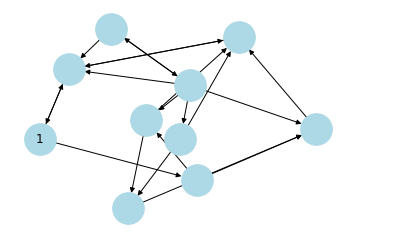

In [122]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def update(labels):
    nx.draw(g, pos, labels=labels, node_size=1000, node_color='lightblue')

fig, ax = plt.subplots()
ani = FuncAnimation(fig, func=update, frames=animation_data, interval=800, repeat=1)
#HTML(ani.to_html5_video())
